## 利用动态规划解决网络世界 （Grid World）问题

例子中的网络世界总共有16个状态，其中状态0与状态15为终止状态，状态空间为$S = \{0,1,2,..., 14,15\}$；处于终止状态的奖励为$R=0$，处于其他状态的奖励为$R=-1$；在每个状态下，参与者有四个可能的行动，其行动空间为$A = \{e,s,w,n\}$。若采取均匀策略$\pi$，即，$\pi(e|.) = 1/4,\pi(s|.) = 1/4, \pi(w|.) = 1/4, \pi(n|.) = 1/4$，且假设折现因子$\gamma = 1$, 试基于动态规划的思想设计迭代算法，评估策略$\pi$，计算策略$\pi$下的状态值函数$v_{\pi}(s)$。

In-place: 142 iterations
Synchronous: 218 iterations


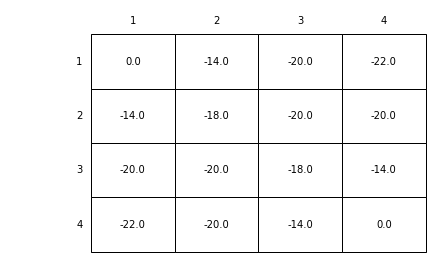

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.table import Table

WORLD_SIZE = 4
# left, up, right, down
ACTIONS = [np.array([0, -1]),
           np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0])]
ACTION_PROB = 0.25

def is_terminal(state):
    x, y = state
    return (x == 0 and y == 0) or (x == WORLD_SIZE - 1 and y == WORLD_SIZE - 1)

def step(state, action):
    state = np.array(state)
    next_state = (state + action).tolist()
    x, y = next_state

    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        next_state = state.tolist()

    reward = -1
    return next_state, reward

def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right',
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center',
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)

def compute_state_value(in_place=False):
    new_state_values = np.zeros((WORLD_SIZE, WORLD_SIZE))
    state_values = new_state_values.copy()
    iteration = 1
    while True:
        src = new_state_values if in_place else state_values
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                if is_terminal([i, j]):
                    continue
                value = 0
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    value += ACTION_PROB * (reward + src[next_i, next_j])
                new_state_values[i, j] = value
        if np.sum(np.abs(new_state_values - state_values)) < 1e-4:
            state_values = new_state_values.copy()
            break

        state_values = new_state_values.copy()
        iteration += 1

    return state_values, iteration

def figure_4_1():
    values, sync_iteration = compute_state_value(in_place=False)
    _, asycn_iteration = compute_state_value(in_place=True)
    draw_image(np.round(values, decimals=2))
    print('In-place: %d iterations' % (asycn_iteration))
    print('Synchronous: %d iterations' % (sync_iteration))

    plt.savefig('figure_4_1.png', dpi=600)
    plt.show()
    plt.close()

if __name__ == '__main__':
    figure_4_1()
